In [246]:
from urllib.request import Request, urlopen
from urllib.parse import quote # 글자를 유니코드(utf-8 ) 인코딩 함수
from urllib import parse
import json # 학습 필요
import datetime
import ssl
import requests
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

        




# api 가져오기

In [144]:
class BusanWater:
    def __init__(self) -> None:
        pass

    def getSearchResult(self):
        url = 'http://apis.data.go.kr/6260000/BusanRvrwtLevelInfoService/getRvrwtLevelInfo'
        params ={'serviceKey' : 'l2SER5UdFnVMTCfW/75Op1w1xj0ZVJyWjxZCA4s2qcMkJIjXonsQeorj8k35mmylOV0ywqc75RoXXtagwXuUnQ==', 'pageNo' : '1', 'numOfRows' : '18', 'resultType' : 'json'}

        response = requests.get(url, params=params)
        if response.status_code == 200: #나중에 처리할 것
            decodecontent = response.content.decode('utf-8')
            return json.loads(decodecontent)
        else:
            return None

# 결과 저장하기

In [145]:
busan = BusanWater()
json_ob = busan.getSearchResult()

# 필요한 값만 남기기

In [146]:
body = json_ob['getRvrwtLevelInfo']['body']['items']['item']


# DataFrame으로 변환하기


In [147]:
import pandas as pd

pd.json_normalize(body)

,siteCode,siteName,waterLevel,dayLevelMax,obsrTime,alertLevel1,alertLevel1Nm,alertLevel2,alertLevel2Nm,alertLevel3,alertLevel3Nm,alertLevel4,alertLevel4Nm,sttus,sttusNm
0,00-200-0003,화명교,0.12,0.13,2024-03-11 21:00,0.0,둔치,0.0,주의,2.5,경계,3.3,위험,00,정상
1,00-200-0001,동천교,0.14,0.15,2024-03-11 20:59,0.0,둔치,0.0,주의,3.0,경계,4.0,위험,00,정상
2,00-200-0002,범5호교,2.65,2.75,2024-03-11 20:59,0.0,둔치,0.0,주의,2.5,경계,3.3,위험,00,정상
3,00-200-0004,학장교,0.13,0.13,2024-03-11 20:59,0.0,둔치,0.0,주의,3.5,경계,4.5,위험,00,정상
4,00-200-0005,동백천,0.05,0.09,2024-03-11 20:59,0.0,둔치,1.19,주의,1.62,경계,1.87,위험,00,정상
5,00-200-0006,임기천,0.31,0.31,2024-03-11 20:59,0.0,둔치,1.8,주의,2.23,경계,2.6,위험,00,정상
6,00-200-0007,용소천,0.6,0.61,2024-03-11 20:59,0.0,둔치,1.68,주의,2.07,경계,2.41,위험,00,정상
7,00-200-0008,효암천,0.17,0.17,2024-03-11 20:59,0.0,둔치,1.79,주의,2.03,경계,2.26,위험,00,정상
8,00-200-0009,고래골천,0.15,0.17,2024-03-11 20:59,0.0,둔치,0.83,주의,1.12,경계,1.4,위험,00,정상
9,00-200-0010,이곡천,0.08,0.09,2024-03-11 20:59,0.0,둔치,1.08,주의,1.36,경계,1.6,위험,00,정상


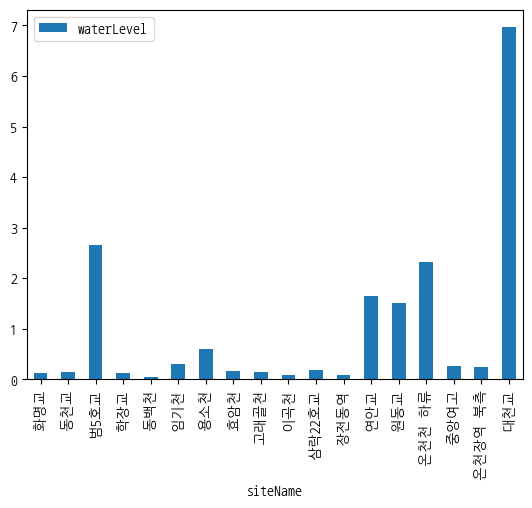

In [253]:
water_pd = pd.json_normalize(body)[['siteName','waterLevel','obsrTime','sttus','sttusNm']]

water_pd1 = pd.json_normalize(body)[['siteName','waterLevel','obsrTime','sttus','sttusNm']]

water_pd['waterLevel'] = pd.to_numeric(water_pd['waterLevel'])
water_pd1['waterLevel'] = pd.to_numeric(water_pd['waterLevel'])

water_pd.plot.bar(y='waterLevel',x='siteName')
plt.show()

# 3분 마다 반복하기